In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

try:
    if path:
        raise Exception('changed')
except:
    path = True
    sys.path.append('../')

from src.data_generator import generate_data
from src.clustering import OrdinalClustering, univariate_em, compute_loglikelihood, compute_p_list

%load_ext autoreload
%autoreload 2

## BOS Distribution

[3 3 2 1 3 3 3 3 1 2 3 2 2 2 4 4 1 3 3 1 3 2 3 2 1 1 1 2 2 2 1 2 4 4 1 2 3
 4 2 4 1 4 1 2 2 4 2 2 3 3 3 3 3 2 1 1 4 3 3 2 4 2 4 2 2 1 2 3 4 2 1 1 2 2
 3 1 2 1 3 2 1 4 2 2 4 1 2 3 2 2 2 2 3 3 1 1 3 3 2 1]
True mu: 2, True pi: 0.22575467839828478


100%|██████████| 4/4 [00:24<00:00,  6.18s/it]

Estimated mu: 2, Estimated pi: 0.21159633704745334


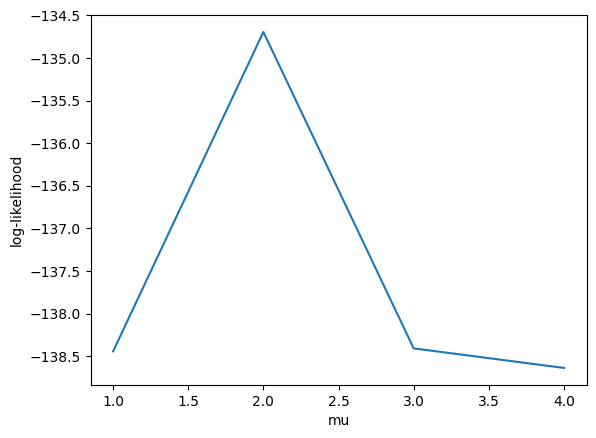

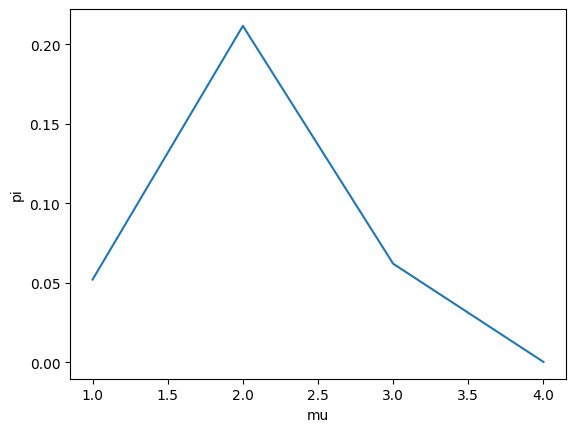

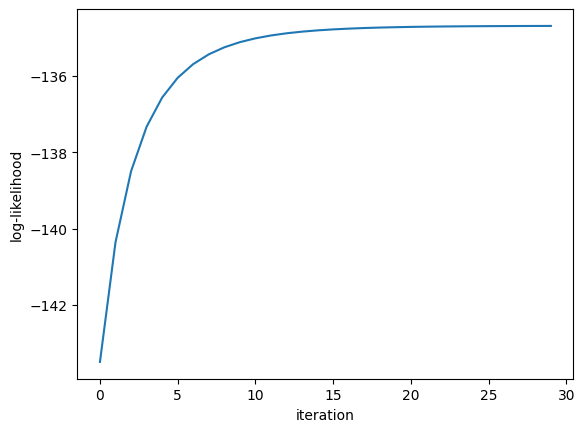

In [2]:
#Univariate
n = 100
m = 4
n_iter = 100
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = np.random.random()

data = generate_data(n, 1, [m], 1, [1], [[true_mu]], [[true_pi]], 0)[
    0
].flatten()
print(data)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

all_lls = []
ll_list = []
pi_list = []
mu_list = list(range(1, m + 1))
for mu in tqdm(mu_list):
    pl, lls, p_tots = univariate_em(data, m, mu, n_iter, eps)
    pi_list.append(pl[-1])
    ll_list.append(compute_loglikelihood(data, p_tots))
    all_lls.append(lls)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_list[np.argmax(ll_list)], pi_list[np.argmax(ll_list)]
    )
)

plt.plot(mu_list, ll_list)
plt.xlabel("mu")
plt.ylabel("log-likelihood")
plt.figure()
plt.plot(mu_list, pi_list)
plt.xlabel("mu")
plt.ylabel("pi")
plt.show()

plt.plot(all_lls[np.argmax(ll_list)])
plt.xlabel("iteration")
plt.ylabel("log-likelihood")
plt.show()


True alpha: [0.33333333 0.33333333 0.33333333], True mu: [[2 3 1]
 [1 2 1]
 [3 2 2]], True pi: [[0.72414785 0.38886743 0.22708397]
 [0.45485988 0.97208251 0.83381823]
 [0.91479066 0.66728484 0.44066609]]
Iteration 0
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [1 3 1]]
Current pi: [[0.96366276 0.38344152 0.79172504]
 [0.52889492 0.56804456 0.92559664]
 [0.07103606 0.0871293  0.0202184 ]]
Log-likelihood: -341.6901444690006

Iteration 1
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [3 2 2]]
Current pi: [[0.87824022 0.80957437 0.88516958]
 [0.49006873 0.36542888 0.65182827]
 [0.00194397 0.08694915 0.02702816]]
Log-likelihood: -306.7679755026436

Iteration 2
--------------------
Current mu: [[1 2 1]
 [2 2 3]
 [3 2 2]]
Current pi: [[0.80664625 0.88699714 0.9261405 ]
 [0.50283756 0.28033392 0.44421278]
 [0.00304541 0.18845818 0.03602084]]
Log-likelihood: -300.7882142909088

Iteration 3
--------------------
Current mu: [[1 2 1]
 [2 3 3]
 [3 2 2]]
Current pi: [[0.76328179 0.910889

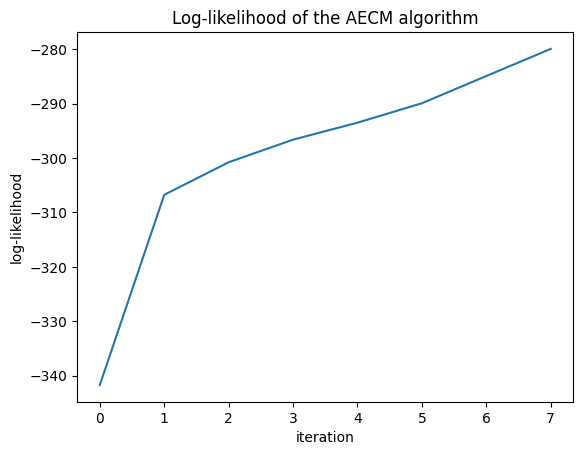

In [3]:
# Multivariate
n = 100
d = 3
n_clusters = 3
n_cat = 3

n_iter = 10
eps = 1e-1

m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = np.random.random((n_clusters, d))
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0)

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.3333333333333333
Estimated alpha: 0.27454758417230263
True mu: [2 3 1]
Estimated mu: [1 2 1]
True pi: [0.72414785 0.38886743 0.22708397]
Estimated pi: [0.71944628 0.94372473 0.98861913]
Cluster 1
True alpha: 0.3333333333333333
Estimated alpha: 0.21098628934581506
True mu: [1 2 1]
Estimated mu: [2 3 3]
True pi: [0.45485988 0.97208251 0.83381823]
Estimated pi: [0.92883892 0.65248573 0.12358608]
Cluster 2
True alpha: 0.3333333333333333
Estimated alpha: 0.5144661264818822
True mu: [3 2 2]
Estimated mu: [3 2 2]
True pi: [0.91479066 0.66728484 0.44066609]
Estimated pi: [0.3848365  0.44174979 0.22496995]


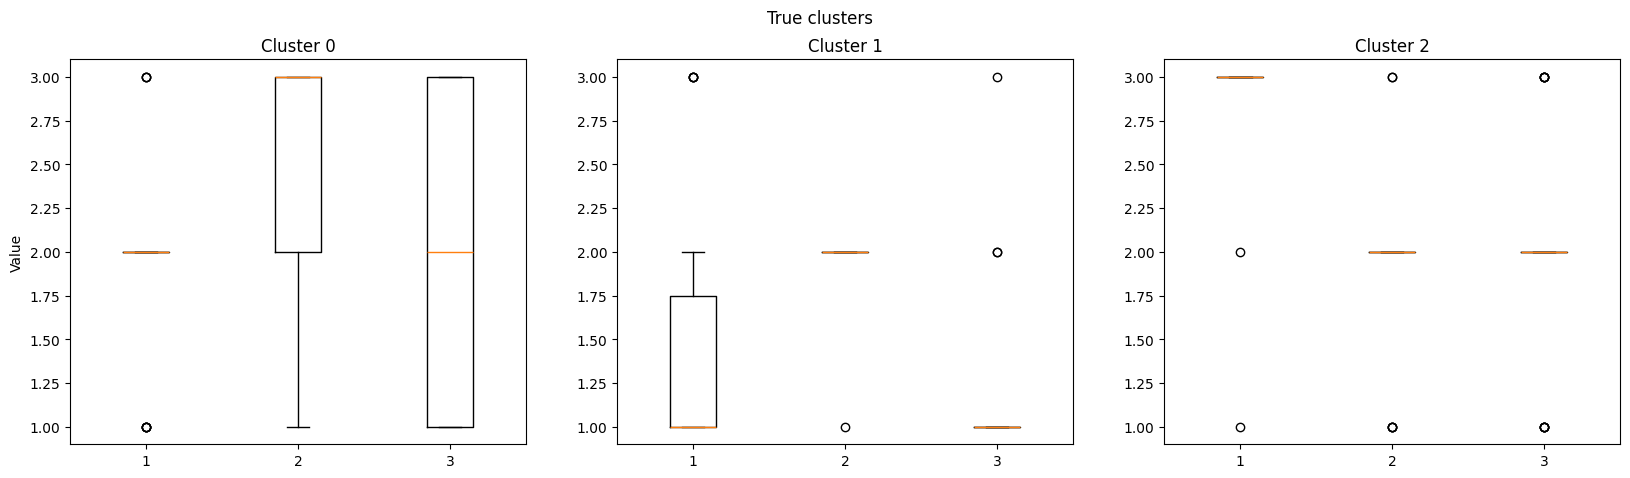

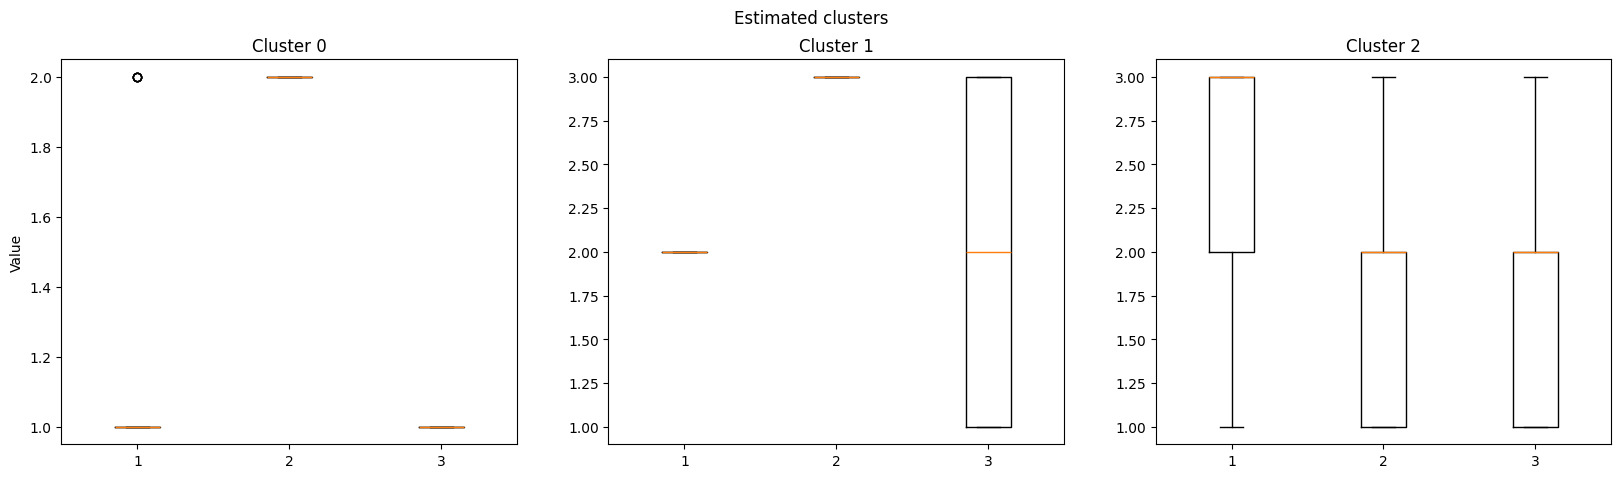

In [4]:
import pandas as pd

#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [5]:
# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [50, 250]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

inits = ["random", "kmeans"]

scores = defaultdict(list)

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = np.random.random((nc, dim))
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0)

                    clustering = OrdinalClustering(nc, model="bos", init=init, n_iter=n_iter, eps=eps)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_bos.csv", index=False)

In [6]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_bos", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[htbp]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the BOS distribution. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results}
\begin{tabular}{lllllrrr}
\toprule
 &  &  &  &  & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.143 & 0.167 & 0.295 \\
 &  &  &  & 3 & 0.135 & 0.667 & 0.116 \\
\cline{4-8}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.090 & 0.200 & 0.172 \\
 &  &  &  & 3 & 0.083 & 0.333 & 0.105 \\
\cline{3-8} \cline{4-8}
 &  & \multirow[t]{4}{*}{5} & \multirow[t]{2}{*}{3} & 2 & 0.099 & 0.667 & 0

$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.143190      0.166667   
                              3                  0.135294      0.666667   
                          5   2                  0.090430      0.200000   
                              3                  0.082694      0.333333   
           5              3   2                  0.098503      0.666667   
                              3                  0.142224      0.777778   
                          5   2                  0.098956      0.400000   
                              3                  0.124854      0.400000   
       250 3              3   2                  0.111190      0.166667   
                              3                  0.021100      0.444444   
                          5   2                  0.151566      0.200000   
                              3                  0.042916      0.266667   
           5              3   2                  0.149301      0.666667   
                              3                  0.314925      0.444444   
                          5   2                  0.134386      0.400000   
                              3                  0.174142      0.466667   
random 50  3              3   2                  0.112016      0.166667   
                              3                  0.084667      0.222222   
                          5   2                  0.010559      0.000000   
                              3                  0.039356      0.066667   
           5              3   2                  0.057622      0.166667   
                              3                  0.072898      0.111111   
                          5   2                  0.095046      0.300000   
                              3                  0.068416      0.066667   
       250 3              3   2                  0.095456      0.000000   
                              3                  0.017916      0.222222   
                          5   2                  0.031206      0.000000   
                              3                  0.017068      0.066667   
           5              3   2                  0.037203      0.166667   
                              3                  0.057108      0.222222   
                          5   2                  0.044444      0.000000   
                              3                  0.020310      0.066667   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.295276  
                              3               0.115681  
                          5   2               0.171997  
                              3               0.105154  
           5              3   2               0.336794  
                              3               0.355775  
                          5   2               0.209700  
                              3               0.156636  
       250 3              3   2               0.344423  
                              3               0.205717  
                          5   2               0.161845  
                              3               0.105588  
           5              3   2               0.423353  
                              3               0.246181  
                          5   2               0.289741  
                              3               0.129370  
random 50  3              3   2               0.074210  
                              3               0.024672  
                          5   2               0.043012  
                              3               0.038114  
           5              3   2               0.081187  
                              3               0.078878  
                          5   2               0.130268  
                              3               0.116771  
       25

## GOD Model

In [7]:
from src.god_model_generator import god_model_sample
from src.god_model_estimator import estimate_mu_pi_grid

n = 1000
m = 4
n_iter = 10000
eps = 1e-3

true_mu = np.random.randint(1, m + 1)
true_pi = (np.random.random() + 1) / 2

data = god_model_sample(m, true_mu, true_pi, n_sample=n, seed=0)

print("True mu: {}, True pi: {}".format(true_mu, true_pi))

mu_hat, pi_hat, ll = estimate_mu_pi_grid(m, data)

print(
    "Estimated mu: {}, Estimated pi: {}".format(
        mu_hat, pi_hat
    )
)

print(ll)

True mu: 1, True pi: 0.7964223091125091


/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:190: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(p)


Estimated mu: 1, Estimated pi: 0.797979797979798
-921.879082109976


True alpha: [0.25 0.25 0.25 0.25], True mu: [[1 2 1 2]
 [2 2 2 1]
 [1 2 1 2]
 [1 2 2 1]], True pi: [[0.5418501  0.79991229 0.61402305 0.70839087]
 [0.65914712 0.82142697 0.71551734 0.55199105]
 [0.60783778 0.75022264 0.89459211 0.50487163]
 [0.80621364 0.55794088 0.80202471 0.91840382]]
Iteration 0
--------------------
Current mu: [[1 2 2 1]
 [2 1 1 1]
 [1 2 1 2]
 [1 1 1 1]]
Current pi: [[0.71875    1.         1.         0.78125   ]
 [1.         0.15       0.55       0.2       ]
 [1.         1.         1.         1.        ]
 [0.93939394 0.60606061 0.6969697  0.84848485]]
Log-likelihood: -255.2634376339392



/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:195: RuntimeWarning: divide by zero encountered in log
  log_likelihood += weights[i] * np.log(p)


Iteration 1
--------------------
Current mu: [[1 2 2 1]
 [2 2 1 2]
 [1 2 1 2]
 [1 1 1 1]]
Current pi: [[0.69191919 1.         1.         0.72222222]
 [1.         0.82323232 0.55050505 0.72222222]
 [1.         1.         1.         1.        ]
 [0.92929293 0.51515152 0.64646465 0.81313131]]
Log-likelihood: -251.6762349664787

Iteration 2
--------------------
Current mu: [[1 2 2 1]
 [2 2 1 2]
 [1 2 1 2]
 [1 2 1 1]]
Current pi: [[0.66666667 1.         1.         0.6969697 ]
 [1.         0.81313131 0.55555556 0.68686869]
 [1.         1.         1.         1.        ]
 [0.92929293 0.52525253 0.61616162 0.78787879]]
Log-likelihood: -250.5285561530924

Iteration 3
--------------------
Current mu: [[1 2 2 1]
 [2 2 1 2]
 [1 2 1 2]
 [1 2 1 1]]
Current pi: [[0.64646465 1.         1.         0.68686869]
 [1.         0.80808081 0.56060606 0.67171717]
 [1.         1.         1.         1.        ]
 [0.92929293 0.55555556 0.59090909 0.77272727]]
Log-likelihood: -249.96037365625781

Iteration 4
------

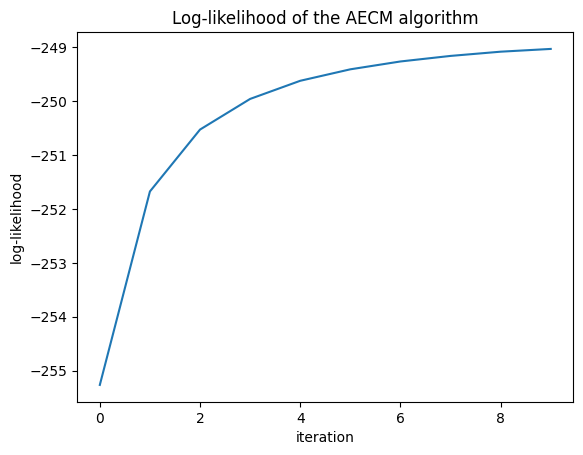

In [8]:
# Multivariate
n = 100
d = 4
n_clusters = 4
n_cat = 2

n_iter = 10
eps = 1e-3

m = np.ones(d).astype(int) * n_cat
true_mu = np.random.randint(1, m + 1, (n_clusters, d))
true_pi = (np.random.random((n_clusters, d)) + 1)/2
true_alpha = np.ones(n_clusters) / n_clusters

data = generate_data(n, d, m, n_clusters, true_alpha, true_mu, true_pi, 0, model="god")

print(
    "True alpha: {}, True mu: {}, True pi: {}".format(
        true_alpha, true_mu, true_pi
    )
)

clustering = OrdinalClustering(n_clusters, model="god", init="kmeans", n_iter=n_iter, eps=eps, silent=False)

alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

labels = clustering.labels_

print(
    "Estimated alpha: {}, Estimated mu: {}, Estimated pi: {}".format(
        alpha_hat, mu_hat, pi_hat
    )
)

plt.plot(ll_list)
plt.ylabel("log-likelihood")
plt.xlabel("iteration")
plt.title("Log-likelihood of the AECM algorithm")
plt.show()

Cluster 0
True alpha: 0.25
Estimated alpha: 0.18660972932132577
True mu: [1 2 1 2]
Estimated mu: [1 2 2 1]
True pi: [0.5418501  0.79991229 0.61402305 0.70839087]
Estimated pi: [0.53030303 1.         1.         0.66666667]
Cluster 1
True alpha: 0.25
Estimated alpha: 0.19292016677860868
True mu: [2 2 2 1]
Estimated mu: [2 2 1 2]
True pi: [0.65914712 0.82142697 0.71551734 0.55199105]
Estimated pi: [1.         0.7979798  0.57575758 0.64646465]
Cluster 2
True alpha: 0.25
Estimated alpha: 0.11006662348694717
True mu: [1 2 1 2]
Estimated mu: [1 2 1 2]
True pi: [0.60783778 0.75022264 0.89459211 0.50487163]
Estimated pi: [1. 1. 1. 1.]
Cluster 3
True alpha: 0.25
Estimated alpha: 0.5104034804131184
True mu: [1 2 2 1]
Estimated mu: [1 2 1 1]
True pi: [0.80621364 0.55794088 0.80202471 0.91840382]
Estimated pi: [0.93939394 0.62626263 0.52525253 0.73737374]


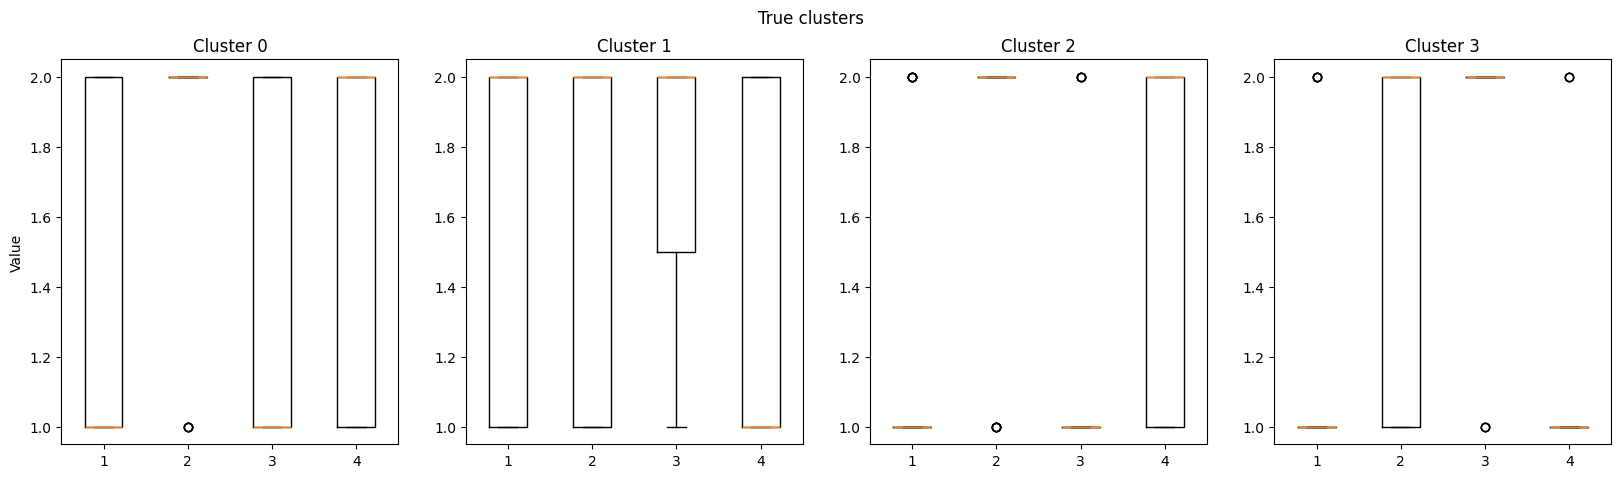

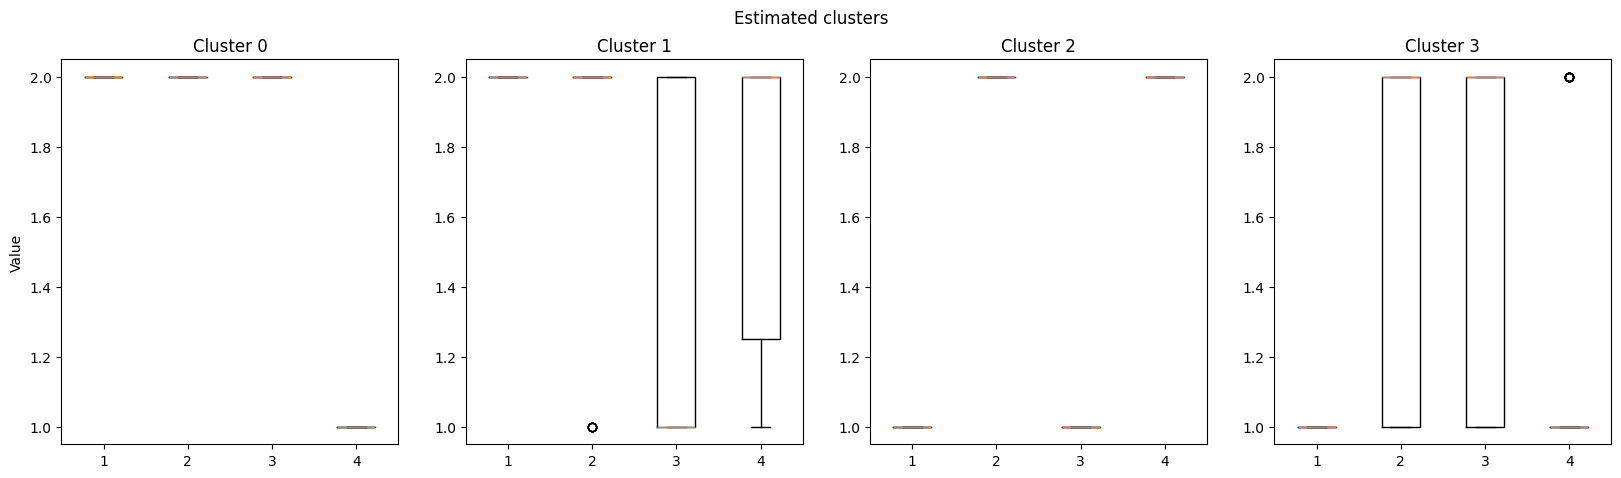

In [9]:
#box plots for each cluster:
figtrue, axtrue = plt.subplots(1, n_clusters, figsize=(20, 5))
figest, axest = plt.subplots(1, n_clusters, figsize=(20, 5))

for i in range(n_clusters):
    print("Cluster {}".format(i))
    print("True alpha: {}".format(true_alpha[i]))
    print("Estimated alpha: {}".format(alpha_hat[i]))
    print("True mu: {}".format(true_mu[i]))
    print("Estimated mu: {}".format(mu_hat[i]))
    print("True pi: {}".format(true_pi[i]))
    print("Estimated pi: {}".format(pi_hat[i]))
    axtrue[i].boxplot(data[0][data[1] == i, :])
    axtrue[i].set_title("Cluster {}".format(i))
    axest[i].boxplot(data[0][labels == i, :])
    axest[i].set_title("Cluster {}".format(i))
axest[0].set_ylabel("Value")
axtrue[0].set_ylabel("Value")
figtrue.suptitle("True clusters")
figest.suptitle("Estimated clusters")
plt.show()

In [10]:

# Experiments:
from collections import defaultdict
from src.utils import optimal_transport_matching

ns = [50, 250]
n_iter = 10

n_clusters = [3, 5]
d = [3, 5]
n_cats = [2, 3]

scores = defaultdict(list)

inits = ["random", "kmeans"]

for n in ns:
    for nc in n_clusters:
        for dim in d:
            for ncats in n_cats:
                for init in inits:
                    m = np.ones(dim).astype(int) * ncats
                    np.random.seed(0)
                    true_mu = np.random.randint(1, ncats + 1, (nc, dim))
                    true_pi = (np.random.random((nc, dim)) + 1)/2 + 1e-3
                    true_alpha = np.random.random(nc)
                    true_alpha = true_alpha / np.sum(true_alpha)

                    data = generate_data(n, dim, m, nc, true_alpha, true_mu, true_pi, 0, model="god")

                    clustering = OrdinalClustering(nc, model="god", init=init, n_iter=n_iter, eps=eps)

                    alpha_hat, mu_hat, pi_hat, ll_list = clustering.fit(data[0], m)

                    labels = clustering.labels_
                    ot_matching = optimal_transport_matching(labels, data[1], nc)

                    alpha_hat = alpha_hat[list(ot_matching.values())]
                    mu_hat = mu_hat[list(ot_matching.values()), :]
                    pi_hat = pi_hat[list(ot_matching.values()), :]

                    delta_alpha = np.linalg.norm(true_alpha - alpha_hat, ord=1)/dim
                    delta_mu = np.linalg.norm(true_mu - mu_hat, ord=1)/(dim*ncats)
                    delta_pi = np.linalg.norm(true_pi - pi_hat, ord=1)/(dim*ncats)

                    scores["init"].append(init)
                    scores["n"].append(n)
                    scores["n_clusters"].append(nc)
                    scores["d"].append(dim)
                    scores["n_cats"].append(ncats)
                    scores["ll"].append(ll_list[-1])
                    scores["pi"].append(pi_hat)
                    scores["mu"].append(mu_hat)
                    scores["alpha"].append(alpha_hat)
                    scores["delta_alpha"].append(delta_alpha)
                    scores["delta_mu"].append(delta_mu)
                    scores["delta_pi"].append(delta_pi)

scores = pd.DataFrame(scores)
scores.to_csv("../data/scores_god.csv", index=False)

/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:195: RuntimeWarning: divide by zero encountered in log
  log_likelihood += weights[i] * np.log(p)
/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:195: RuntimeWarning: divide by zero encountered in log
  log_likelihood += weights[i] * np.log(p)
/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:195: RuntimeWarning: divide by zero encountered in log
  log_likelihood += weights[i] * np.log(p)
/Users/aliramlaoui/Library/CloudStorage/GoogleDrive-ramlaouiali@gmail.com/My Drive/Cours 3A/PGM/project/Ordinal-data-clustering/notebooks/../src/god_model_estimator.py:195: RuntimeWarning: divide by zer

In [11]:
scores_short = scores.drop(["pi", "mu", "alpha", "ll"], axis=1)
scores_short.columns = [
    "Init.",
    "$n$",
    "$n_{clusters}$",
    "$d$",
    "$n_{cats}$",
    rf"$\Delta \alpha$",
    rf"$\Delta \mu$",
    rf"$\Delta \pi$",
]
scores_short = scores_short.groupby(["Init.", "$n$", "$n_{clusters}$", "$d$", "$n_{cats}$"]).mean()
# scores_short = scores_short.transpose()

caption = "Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters."

print(scores_short.to_latex(caption=caption, float_format="%.3f",
                            label="tab:results_god", escape=False,
                            position="H",
                            multicolumn_format="c",
                            ))
scores_short

\begin{table}[H]
\caption{Results of the experiments for the AECM algorithm no synthethic data with the GOD model. The parameters are the number of samples $n$, the number of clusters $n_{clusters}$, the dimension $d$ and the number of categories $n_{cats}$. The deltas are the average of the $L_1$ distances between the true and estimated parameters after applying optimal transport to find the correct clusters.}
\label{tab:results_god}
\begin{tabular}{lllllrrr}
\toprule
 &  &  &  &  & $\Delta \alpha$ & $\Delta \mu$ & $\Delta \pi$ \\
Init. & $n$ & $n_{clusters}$ & $d$ & $n_{cats}$ &  &  &  \\
\midrule
\multirow[t]{16}{*}{kmeans} & \multirow[t]{8}{*}{50} & \multirow[t]{4}{*}{3} & \multirow[t]{2}{*}{3} & 2 & 0.103 & 0.167 & 0.166 \\
 &  &  &  & 3 & 0.132 & 0.444 & 0.095 \\
\cline{4-8}
 &  &  & \multirow[t]{2}{*}{5} & 2 & 0.063 & 0.300 & 0.088 \\
 &  &  &  & 3 & 0.074 & 0.067 & 0.020 \\
\cline{3-8} \cline{4-8}
 &  & \multirow[t]{4}{*}{5} & \multirow[t]{2}{*}{3} & 2 & 0.082 & 0.333 & 0.207 \

$\Delta \alpha$  $\Delta \mu$  \
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                                  
kmeans 50  3              3   2                  0.103190      0.166667   
                              3                  0.132070      0.444444   
                          5   2                  0.062594      0.300000   
                              3                  0.074200      0.066667   
           5              3   2                  0.082131      0.333333   
                              3                  0.148552      0.777778   
                          5   2                  0.102316      0.300000   
                              3                  0.194252      0.400000   
       250 3              3   2                  0.092523      0.166667   
                              3                  0.079340      0.222222   
                          5   2                  0.088169      0.200000   
                              3                  0.120605      0.266667   
           5              3   2                  0.082699      0.833333   
                              3                  0.104087      0.888889   
                          5   2                  0.096776      0.300000   
                              3                  0.112753      0.400000   
random 50  3              3   2                  0.063446      0.166667   
                              3                  0.113374      0.333333   
                          5   2                  0.050197      0.100000   
                              3                  0.075145      0.266667   
           5              3   2                  0.057944      0.333333   
                              3                  0.177117      0.666667   
                          5   2                  0.082512      0.400000   
                              3                  0.152951      0.466667   
       250 3              3   2                  0.032230      0.166667   
                              3                  0.196605      0.222222   
                          5   2                  0.014488      0.200000   
                              3                  0.072156      0.133333   
           5              3   2                  0.051699      0.166667   
                              3                  0.097843      0.888889   
                          5   2                  0.057541      0.400000   
                              3                  0.164497      0.400000   

                                          $\Delta \pi$  
Init.  $n$ $n_{clusters}$ $d$ $n_{cats}$                
kmeans 50  3              3   2               0.165706  
                              3               0.094731  
                          5   2               0.088414  
                              3               0.020001  
           5              3   2               0.206612  
                              3               0.118049  
                          5   2               0.122312  
                              3               0.088657  
       250 3              3   2               0.152168  
                              3               0.076279  
                          5   2               0.071490  
                              3               0.072662  
           5              3   2               0.210843  
                              3               0.124745  
                          5   2               0.110294  
                              3               0.064078  
random 50  3              3   2               0.104142  
                              3               0.083508  
                          5   2               0.057012  
                              3               0.053263  
           5              3   2               0.144778  
                              3               0.091766  
                          5   2               0.111568  
                              3               0.056041  
       25